In [3]:
import numpy as np

def rmsf(u, u_ref):
    chains = np.unique([a.segid for a in u.atoms if a.name == 'CA'])
    normalized_rmsfs = []

    for chain in chains:
        chain_selection = f"protein and segid {chain} and name CA"
        ca_positions_ref = u_ref.select_atoms(chain_selection).positions
        ca_positions_new = u.select_atoms(chain_selection).positions

        rmsfs = np.sqrt(np.mean((ca_positions_new - ca_positions_ref) ** 2, axis=1))
        normalized_rmsf = rmsfs / np.max(rmsfs)
        normalized_rmsfs.append(normalized_rmsf)

    return normalized_rmsfs


In [4]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# Load the PDB and XTC files
u_ref_5uh5 = mda.Universe('5uh5.pdb')
u_5uh5 = mda.Universe('5uh5.pdb', '5uh5.xtc')

u_ref_6c04 = mda.Universe('6c04.pdb')
u_6c04 = mda.Universe('6c04.pdb', '6c04.xtc')

# Define a selection for the alpha carbon atoms
ca_selection = 'protein and name CA'

# Select the alpha carbon atoms from the reference structure
ca_ref_5uh5 = u_ref_5uh5.select_atoms(ca_selection)
ca_ref_6c04 = u_ref_6c04.select_atoms(ca_selection)

# Calculate the mean positions of the alpha carbon atoms in the reference structure
ca_positions_ref_5uh5 = np.mean(ca_ref_5uh5.positions, axis=0)
ca_positions_ref_6c04 = np.mean(ca_ref_6c04.positions, axis=0)

In [8]:
rmsfs_5uh5 = rmsf(u_5uh5, u_ref_5uh5)
rmsfs_6c04 = rmsf(u_6c04, u_ref_6c04)

[0.00236957 0.00282867 0.00238025 0.00244193 0.0028233  0.00282149
 0.00264526 0.00283047 0.00283048 0.00282149 0.00282149 0.00282149
 0.00282867 0.00281969 0.00282867 0.00264719 0.00264526 0.00282687
 0.00282867 0.00281969 0.00244193 0.00282867 0.00237597 0.00237811
 0.00215907 0.00238025 0.0028233  0.00264719 0.00264719 0.00282687
 0.00282867 0.00281969 0.00282687 0.00282149 0.00282149 0.00263951
 0.00282149 0.00264719 0.00245023 0.00237597 0.00282867 0.00264719
 0.00282867 0.00264622 0.00282149 0.00282149 0.00283047 0.00238025
 0.00237597 0.00283047 0.00244608 0.00264719 0.00282328 0.00282867
 0.00282867 0.00283047 0.00283047 0.00282508 0.00264335 0.00283228
 0.0021626  0.00237597 0.00264912 0.00283047 0.00282957 0.00282957
 0.00264335 0.0026472  0.00264142 0.00282688 0.00282867 0.00282508
 0.00282508 0.00283047 0.00283048 0.00282867 0.00238451 0.00283047
 0.00264623 0.00264526 0.00282149 0.00282867 0.00263951 0.00283047
 0.00282867 0.00283047 0.0028233  0.00282687 0.00282149 0.0028

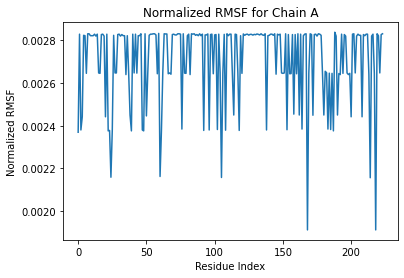

[0.00264526 0.00263951 0.00281969 0.00264719 0.0028233  0.00282687
 0.00264526 0.00264526 0.00282867 0.00264719 0.00264526 0.00283047
 0.00282149 0.00282867 0.00264719 0.00282867 0.00264816 0.00263758
 0.00263951 0.00282867 0.00282149 0.00282867 0.00282149 0.00264816
 0.00282867 0.00264526 0.00264526 0.00282867 0.00263758 0.00282867
 0.00282867 0.00282867 0.00283228 0.00283047 0.00238026 0.00263951
 0.00263951 0.00238025 0.00283047 0.0026443  0.00263951 0.00215671
 0.00282149 0.00282867 0.00282687 0.00282149 0.00283228 0.00238025
 0.00216495 0.00263951 0.00244193 0.00263758 0.00281969 0.00282687
 0.00264526 0.00263951 0.00216377 0.00238025 0.00238026 0.00264719
 0.00283048 0.00282149 0.00282867 0.00263951 0.00263951 0.00215672
 0.00238666 0.00282867 0.00263951 0.00191249 0.00263758 0.00244298
 0.00282149 0.00282149 0.00263855 0.00237597 0.00238665 0.00282149
 0.00263951 0.00237811 0.00237811 0.00264526 0.00282149 0.00264719
 0.00244193 0.00264048 0.00263758 0.00282149 0.00283048 0.0023

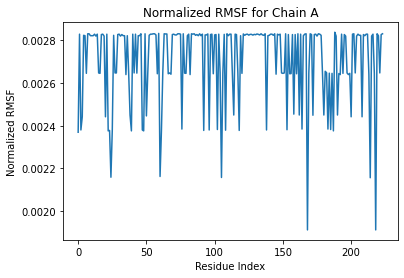

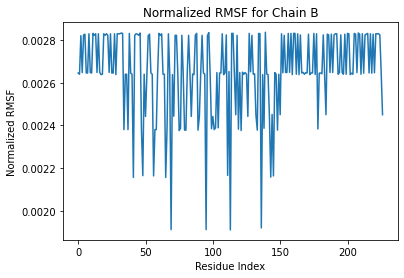

[0.00264335 0.00264238 0.00283047 ... 0.00245128 0.00264719 0.00264912]


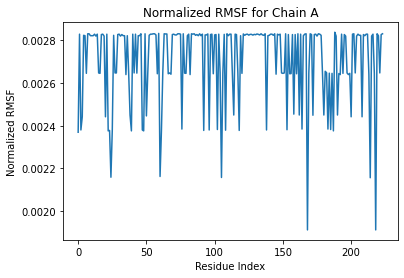

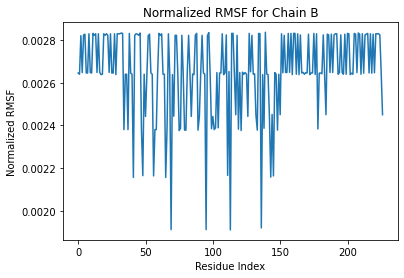

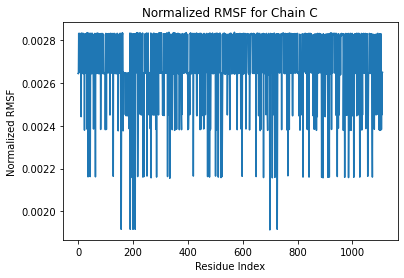

[0.0026443  0.00216263 0.00282869 ... 0.00283048 0.00264335 0.00282418]


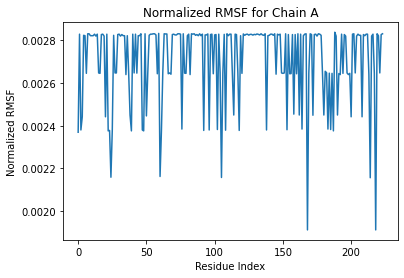

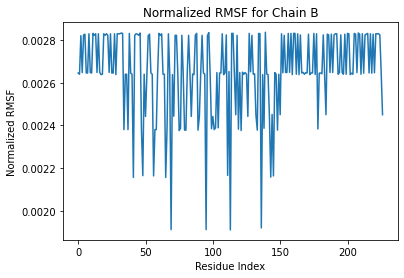

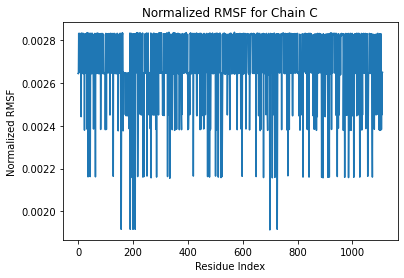

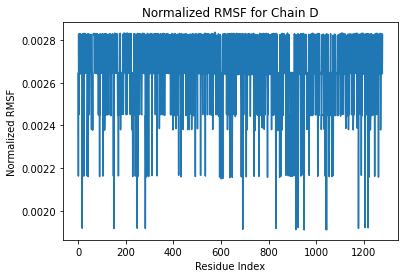

[0.00282867 0.00282867 0.0028233  0.00215907 0.00264719 0.00215907
 0.00264239 0.00264142 0.00245023 0.00264142 0.00264526 0.00244815
 0.0028305  0.00244193 0.00264719 0.00282869 0.00245233 0.00264142
 0.00264335 0.00264719 0.00264526 0.00264526 0.00282687 0.00282867
 0.00283048 0.00264142 0.00282867 0.00264045 0.00264526 0.00282869
 0.00282687 0.00282867 0.00282328 0.00264142 0.00264335 0.00282328
 0.00264719 0.00264719 0.00264526 0.00282687 0.00264142 0.00264719
 0.00283048 0.00282867 0.00216379 0.00264719 0.00282687 0.00264622
 0.00282687 0.00264334 0.00264335 0.00237917 0.00264526 0.00282867
 0.00264335 0.00282867 0.00263949 0.00265103 0.00282867 0.00264239
 0.00237811 0.00264335 0.00264045 0.00282508 0.00264335 0.00264719
 0.00282508 0.00282689 0.00238131 0.00264335 0.00282867 0.00282869
 0.00263949 0.00282869 0.00264528 0.00282508 0.00282328 0.00264142
 0.00216024 0.00264526 0.00264528]


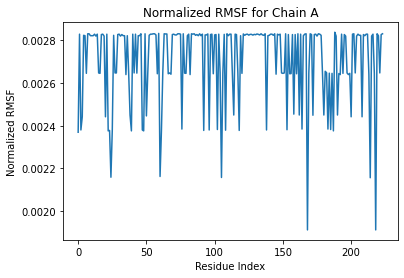

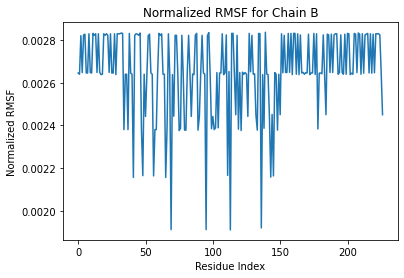

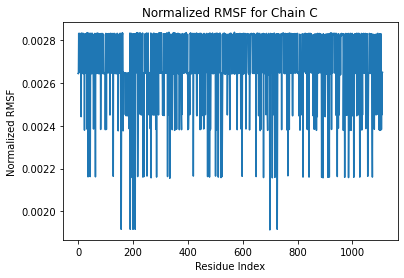

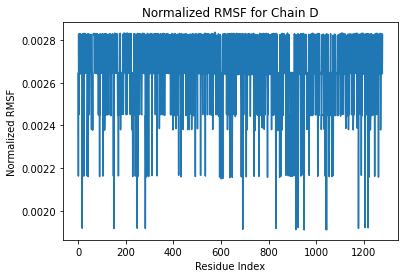

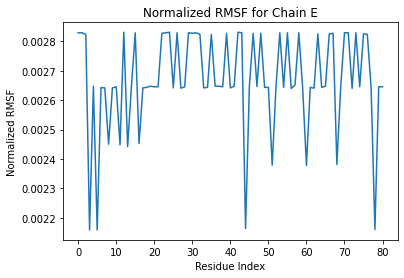

[0.0024523  0.00264334 0.00283049 0.00264719 0.00245023 0.00216143
 0.00282867 0.00216498 0.00244919 0.00264526 0.00264527 0.00264334
 0.00245128 0.00237917 0.00283227 0.00282867 0.00264719 0.00264142
 0.00264719 0.00283047 0.00244815 0.00282688 0.00264719 0.00282867
 0.00282867 0.00282867 0.00264719 0.00282867 0.00283047 0.00282867
 0.00245023 0.00264719 0.00282867 0.00264526 0.00264623 0.00264719
 0.00282688 0.00238131 0.00282687 0.00264719 0.00264816 0.00282867
 0.00245233 0.00282957 0.00283047 0.00282957 0.00282867 0.00264719
 0.00238131 0.00238425 0.00282867 0.00264622 0.0021626  0.00245231
 0.00264815 0.00282867 0.00264622 0.00282687 0.00264623 0.00238345
 0.00282867 0.00216112 0.00282957 0.00282957 0.00245128 0.00264622
 0.00283047 0.00264622 0.00264719 0.00238131 0.00238345 0.0021626
 0.00283228 0.00245231 0.00282957 0.00282687 0.00282867 0.00283138
 0.00282958 0.00283137 0.00264526 0.00264911 0.00283047 0.00264814
 0.00238345 0.00245128 0.00245023 0.00216024 0.00265008 0.00282

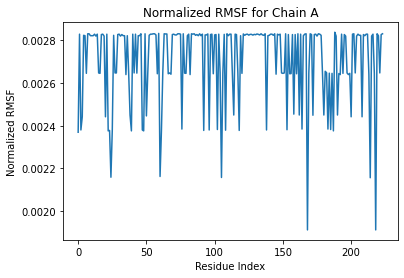

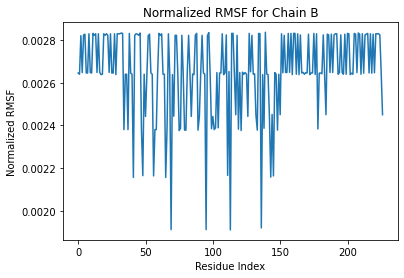

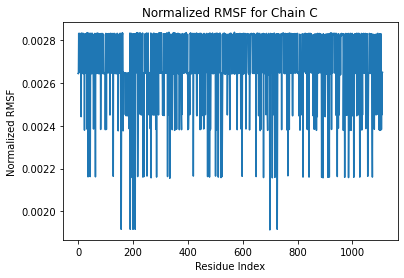

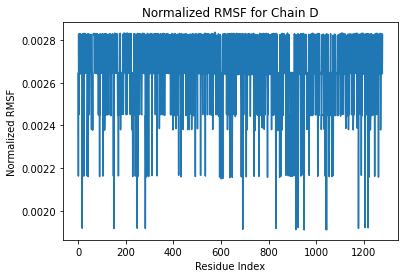

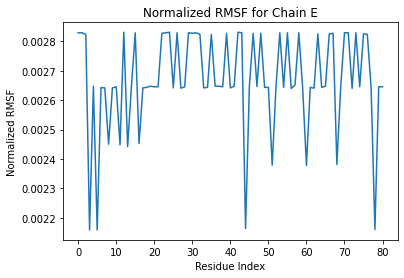

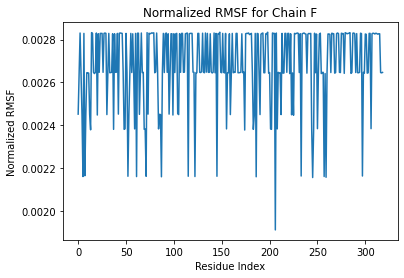

[0.00191315 0.00191447 0.00191647 0.00191119 0.00191713 0.00191647
 0.00191647 0.00191447 0.00191248 0.00191248 0.00191647 0.00191385
 0.0019158  0.00191447 0.00191647 0.00191248 0.00191248 0.00191182
 0.00191381 0.00191647 0.00191381 0.00191647 0.00191182 0.00191647
 0.00191385 0.00191515 0.00191647 0.00191647 0.00191647 0.00191182
 0.00191248 0.00191381 0.00191647 0.0019158  0.00191447 0.00191381
 0.0019158  0.00191447 0.0019158  0.00191647 0.00191646 0.00191447
 0.00191447 0.00191647 0.00191447 0.00191647 0.00191381 0.00191447
 0.00191381 0.00191713 0.00191447 0.0019158  0.00191579 0.00191579
 0.00191447 0.00191447 0.00191579 0.00191447 0.00191182 0.00191381
 0.00191514 0.00191381 0.00191447 0.00191546 0.00191647 0.00191647
 0.00191779 0.00191215 0.00191779 0.00191579 0.00191447 0.0019158
 0.0019138  0.00191579 0.00191447 0.00191381 0.00191579 0.00191713
 0.0019158  0.0019158  0.00191447 0.00191381 0.00191447 0.00191647
 0.00191182 0.00191447 0.00191447 0.00191248 0.00191447 0.00191

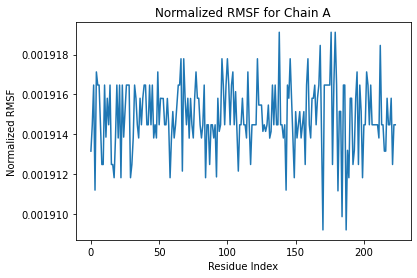

[0.00191248 0.00191447 0.00191315 0.00191248 0.00191248 0.0019158
 0.00191713 0.00191519 0.00191315 0.00191315 0.00191447 0.00191053
 0.00191713 0.00191447 0.00191315 0.00191447 0.00191447 0.00191447
 0.00191447 0.00191447 0.00191115 0.00191447 0.00191713 0.00191647
 0.00191315 0.00191315 0.00191713 0.00191447 0.00191447 0.00191713
 0.00191515 0.00191647 0.00191315 0.00191647 0.00191248 0.00191515
 0.00191447 0.00191515 0.00191385 0.00191447 0.00191447 0.00191385
 0.0019158  0.00191186 0.00190986 0.00191647 0.00191248 0.00191515
 0.00191514 0.00191912 0.00191647 0.00191647 0.00191647 0.00191515
 0.00191647 0.00191515 0.00191785 0.00191647 0.00191383 0.00191248
 0.00191515 0.00191115 0.0019178  0.00191515 0.0019125  0.00191647
 0.00191647 0.00191383 0.00191514 0.00191253 0.00191515 0.00191647
 0.0019178  0.00191647 0.00191647 0.00191515 0.00191647 0.00191647
 0.00191186 0.00191053 0.00191186 0.00191053 0.00191515 0.00191515
 0.00191315 0.00191315 0.00190986 0.00191912 0.00191647 0.00191

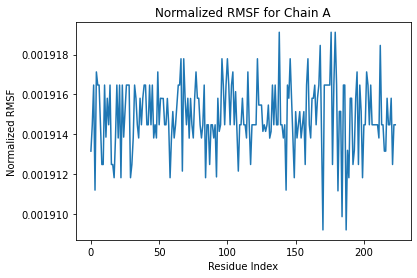

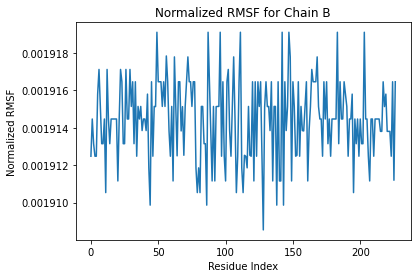

[0.00192144 0.00191779 0.00191647 ... 0.00191248 0.0019138  0.00191647]


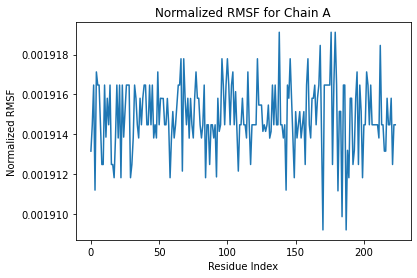

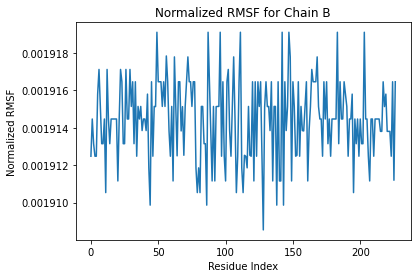

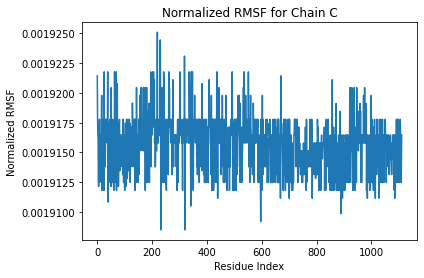

[0.00191447 0.00191447 0.00191579 ... 0.00191447 0.00191447 0.00191647]


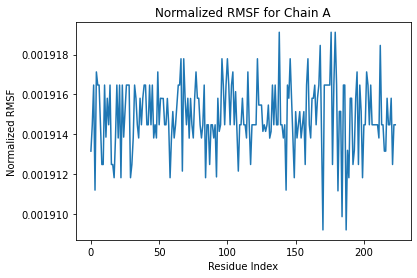

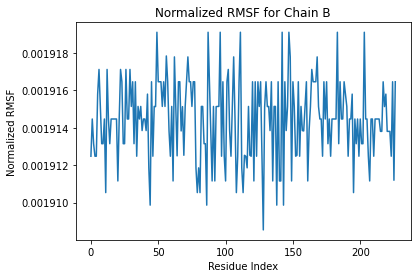

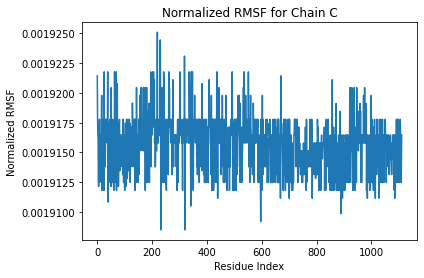

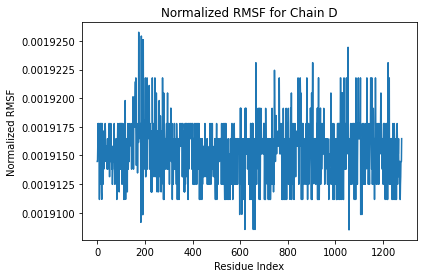

[0.00191647 0.00191515 0.00191515 0.00191315 0.00191912 0.00191315
 0.00191315 0.00191447 0.00191315 0.00191315 0.00191315 0.00191447
 0.00191516 0.00191515 0.0019178  0.00191315 0.00191248 0.00191647
 0.00191579 0.00191647 0.00191779 0.00191647 0.0019138  0.00191248
 0.00191779 0.00191115 0.00191447 0.00191447 0.00191447 0.00191515
 0.00191447 0.00191447 0.00191447 0.00191779 0.00191248 0.00191447
 0.00191447 0.00191579 0.00191579 0.00191579 0.00191647 0.00191248
 0.00191447 0.00191115 0.00191579 0.00191579 0.00191579 0.00191115
 0.00191447 0.00191315 0.00191447 0.00191447 0.00191579 0.00191315
 0.00191647 0.00191315 0.00191515 0.00191579 0.00191579 0.00191115
 0.00191579 0.00191315 0.00191447 0.00191315 0.00191447 0.00191447
 0.00191647 0.00191315 0.00191579 0.00191316 0.00191248 0.00191248
 0.00191647 0.00191315 0.00191579 0.00191447 0.00191579 0.00191516
 0.00191579 0.00191115 0.00191647]


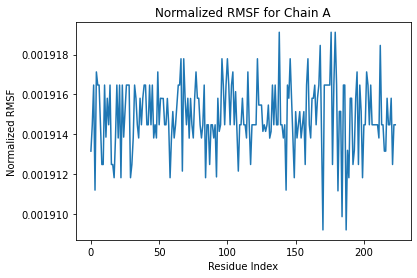

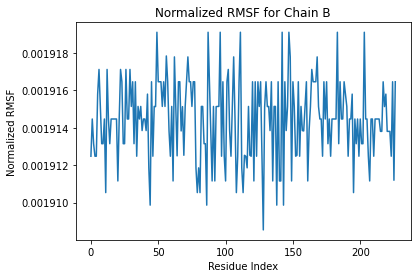

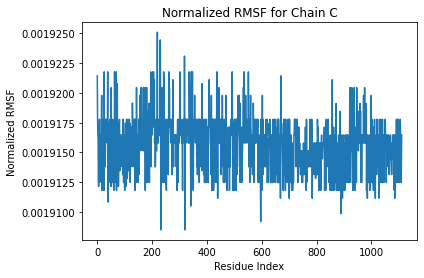

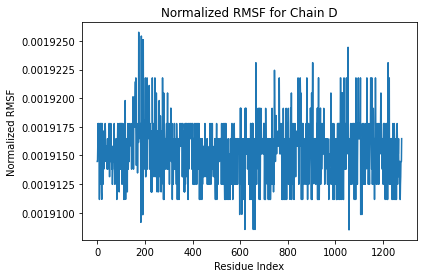

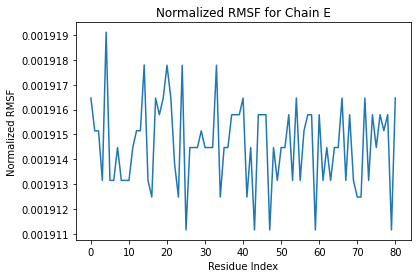

[0.00192177 0.00191647 0.00191713 0.00191779 0.00191779 0.00192177
 0.00191779 0.00191647 0.00191779 0.00191779 0.0019158  0.00191314
 0.00191314 0.00191647 0.0019138  0.00191647 0.00191248 0.00191314
 0.00191248 0.0019158  0.00191647 0.0019198  0.0019138  0.00191779
 0.00192177 0.0019138  0.00191779 0.00191779 0.00191647 0.0019138
 0.00191314 0.00191646 0.00191713 0.00191314 0.0019138  0.00191746
 0.00191713 0.00191779 0.00191746 0.00191713 0.0019138  0.00191314
 0.00191347 0.00191413 0.00191647 0.0019138  0.00191215 0.0019138
 0.00191614 0.00191779 0.00191647 0.00191746 0.0019138  0.00191647
 0.00191746 0.00191647 0.00191779 0.00191779 0.00191812 0.00191779
 0.00191779 0.00191762 0.00191779 0.00191762 0.00191762 0.00191397
 0.0019138  0.00191779 0.00191779 0.00191779 0.00191347 0.00191347
 0.00191248 0.00191647 0.00191746 0.00191614 0.00191248 0.00191746
 0.00191647 0.00191746 0.00191647 0.00191779 0.0019158  0.00191713
 0.0019138  0.00191647 0.00191713 0.00191779 0.0019138  0.001913

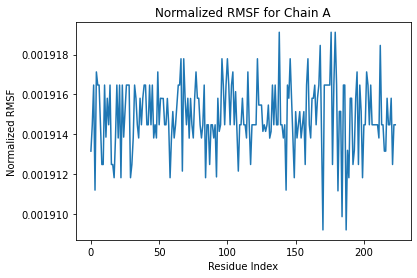

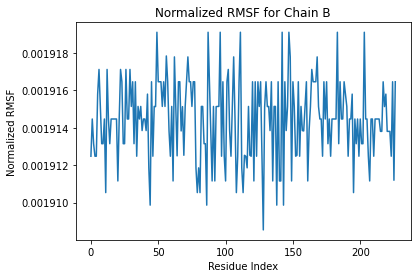

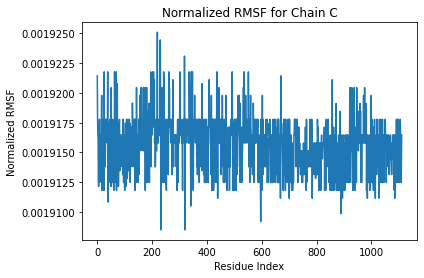

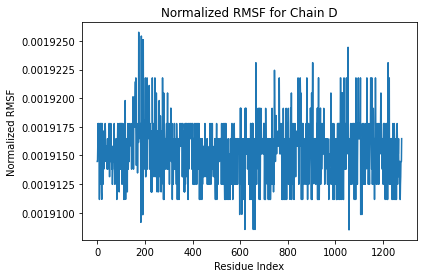

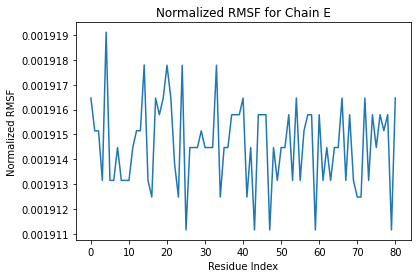

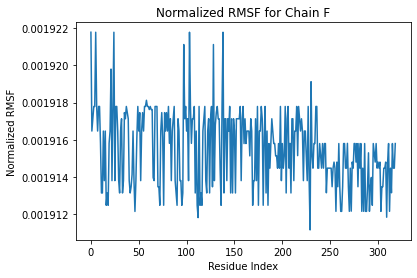

[0.00191713 0.00191579 0.00191447 0.00191447 0.00191248 0.00191647
 0.00191647 0.00191315 0.00191647 0.00191515 0.00191447 0.00191447
 0.00191447 0.0019178  0.00191579 0.00191447 0.00191579 0.00191447
 0.00191315 0.00191579 0.00191447 0.00191579 0.0019138  0.00191447
 0.00191381 0.00191513 0.00191513 0.00191647 0.00191514 0.00191779
 0.00191513 0.00191513 0.0019138  0.00191579 0.00191513 0.00191579
 0.00191513 0.00191579 0.00191513 0.00191381 0.00191579 0.0019158
 0.00191381 0.00191381 0.00191381 0.00191579 0.00191779 0.00191579
 0.00191579 0.00191513 0.00191713 0.00191314 0.00191713 0.00191579
 0.00191248 0.00191646 0.00191579 0.00191513 0.00191513 0.00191381
 0.00191182 0.00191513 0.00191381 0.00191248 0.00191579 0.0019138
 0.00191513 0.00191447 0.00191579 0.00191381 0.00191513 0.00191779
 0.00191579 0.00191713 0.00191713 0.00191779 0.00191779 0.0019158
 0.00191647 0.00191647 0.00191713 0.00191347 0.00191746 0.00191713
 0.00191281 0.00191746 0.00191314 0.00191746 0.00191713 0.0019171

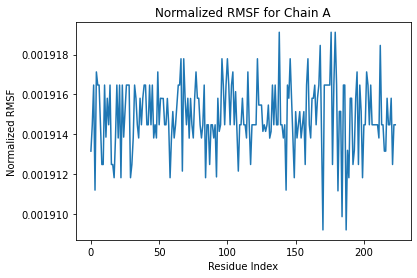

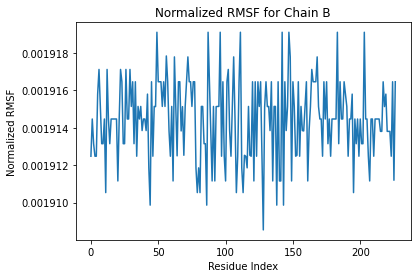

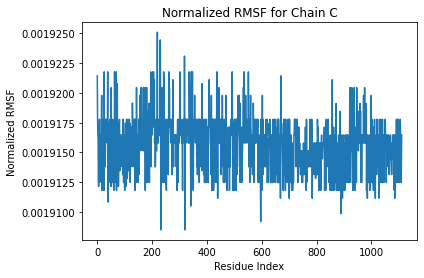

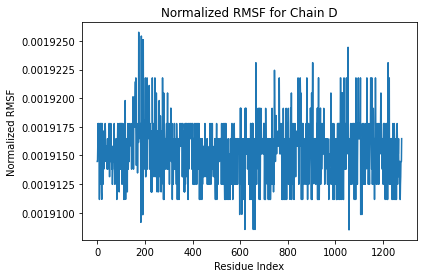

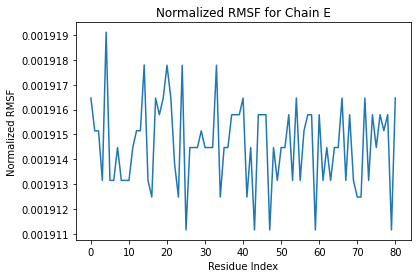

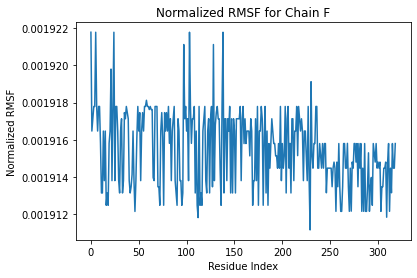

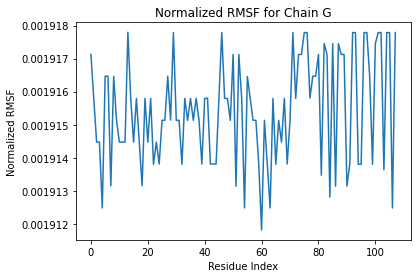

"\n# Plot and save the RMSF for 6c04\nfor chain, rmsf_1 in zip(chains, rmsfs_5uh5):\n    plt.figure()\n    plt.plot(rmsf_1)\n    plt.xlabel('Residue Index')\n    plt.ylabel('Normalized RMSF')\n    plt.title(f'Normalized RMSF for Chain {chain}')\n    #plt.savefig(chain+'_RMSf_6C04.png',dpi = 600)\n    plt.show()\n"

In [18]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# Define the rmsf function
def rmsf(u, u_ref):
    chains = np.unique([a.segid for a in u.atoms if a.name == 'CA'])
    normalized_rmsfs = []

    for chain in chains:
        chain_selection = f"protein and segid {chain} and name CA"
        ca_positions_ref = u_ref.select_atoms(chain_selection).positions
        ca_positions_new = u.select_atoms(chain_selection).positions

        rmsfs = np.sqrt(np.mean((ca_positions_new - ca_positions_ref) ** 2, axis=1))
        normalized_rmsf = rmsfs 
        #/ np.max(rmsfs)
        print(normalized_rmsf)
        normalized_rmsfs.append(normalized_rmsf)

        for chain, normalized_rmsf in zip(chains, normalized_rmsfs):
            plt.figure()
            plt.plot(normalized_rmsf)
            plt.xlabel('Residue Index')
            plt.ylabel('Normalized RMSF')
            plt.title(f'Normalized RMSF for Chain {chain}')
            #plt.savefig(chain+'_RMSf_6C04.png',dpi = 600)
            plt.show()

    return normalized_rmsfs

# Load the PDB and XTC files for 5uh5
u_ref_5uh5 = mda.Universe('5uh5.pdb')
u_5uh5 = mda.Universe('5uh5.pdb', '5uh5.xtc')

# Calculate RMSF for 5uh5
rmsfs_5uh5 = rmsf(u_5uh5, u_ref_5uh5)
'''
# Plot and save the RMSF for 5uh5
for chain, rmsf_values in enumerate(rmsfs_5uh5):
    plt.plot(rmsf_values, label=f'Chain {chain+1}')
    plt.xlabel('Frame')
    plt.ylabel('RMSD (Å)')
    plt.legend()
    #plt.savefig('5uh5_rmsd.png', dpi=300)
    plt.show()
'''
# Load the PDB and XTC files for 6c04
u_ref_6c04 = mda.Universe('6c04.pdb')
u_6c04 = mda.Universe('6c04.pdb', '6c04.xtc')

# Calculate RMSF for 6c04
rmsfs_6c04 = rmsf(u_6c04, u_ref_6c04)
'''
# Plot and save the RMSF for 6c04
for chain, rmsf_1 in zip(chains, rmsfs_5uh5):
    plt.figure()
    plt.plot(rmsf_1)
    plt.xlabel('Residue Index')
    plt.ylabel('Normalized RMSF')
    plt.title(f'Normalized RMSF for Chain {chain}')
    #plt.savefig(chain+'_RMSf_6C04.png',dpi = 600)
    plt.show()
'''


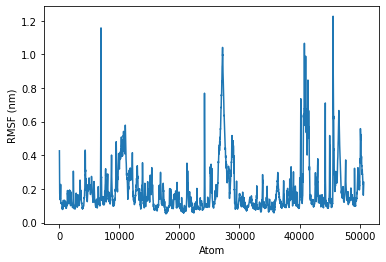

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data from the rmsf.xvg file
data = np.loadtxt('rmsf_CA_5uh5.xvg', comments=['@', '#'])

# Extract the atom indices and RMSF values
atom_indices = data[:, 0]
rmsf_values = data[:, 1]

# Plot the RMSF values
plt.plot(atom_indices, rmsf_values)
plt.xlabel('Atom')
plt.ylabel('RMSF (nm)')
plt.savefig('rmsf_plot_5uh5.png', dpi=300)
plt.show()



In [33]:
import numpy as np

# Load the data from the rmsf_6c04.xvg file
data = np.loadtxt('rmsf_CA_5uh5.xvg', comments=['@', '#'])

# Extract the atom indices and RMSF values
atom_indices = data[:, 0]
rmsf_values = data[:, 1]

# Load the PDB file to extract chain and residue information
pdb_file = '5uh5.pdb'
chains = []
residue_numbers = []

with open(pdb_file, 'r') as pdb:
    for line in pdb:
        if line.startswith('ATOM'):
            chain = line[21]
            residue_number = int(line[22:26])
            if line[13:15] == 'CA':
                #print(chain)
                chains.append(chain)
                #print(residue_number)
                residue_numbers.append(str(residue_number))

# Create a new array with chain information, residue numbers, and RMSF values
processed_data = np.column_stack((chains, residue_numbers, rmsf_values))

# Save the processed data to a new file
output_file = 'rmsf_5uh5_processed.txt'
np.savetxt(output_file, processed_data, fmt='%s')
#np.savetxt(output_file, processed_data, fmt='%s\t%s\t%.4f')

#print(f"Processed data saved to {output_file}.")
print(processed_data)


[['A' '3' '0.4264']
 ['A' '4' '0.3087']
 ['A' '5' '0.2276']
 ...
 ['F' '525' '0.2206']
 ['F' '526' '0.2192']
 ['F' '527' '0.2388']]


In [34]:
import numpy as np
import plotly.graph_objects as go

# Load the processed data file
data = np.loadtxt('rmsf_6c04_processed.txt', dtype=str)

# Extract chain, residue number, and RMSF values
chains = data[:, 0]
residue_numbers = data[:, 1].astype(int)
rmsf_values = data[:, 2].astype(float)

# Get unique chains
unique_chains = np.unique(chains)

# Plot RMSF for each chain separately
for chain in unique_chains:
    chain_indices = np.where(chains == chain)[0]
    chain_residue_numbers = residue_numbers[chain_indices]
    chain_rmsf_values = rmsf_values[chain_indices]

    # Normalize RMSF
    normalized_rmsf = chain_rmsf_values / np.max(chain_rmsf_values)

    # Create the plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=chain_residue_numbers, y=normalized_rmsf,
                             mode='lines', name=f'Chain {chain}'))

    # Customize the plot
    fig.update_layout(title=f'RMSF for Chain {chain}',
                      xaxis_title='Residue Number',
                      yaxis_title='Normalized RMSF')

    # Show the plot
    fig.show()




In [35]:
import numpy as np
import plotly.graph_objects as go

# Load the processed data files
data_5uh5 = np.loadtxt('rmsf_5uh5_processed.txt', dtype=str)
data_6c04 = np.loadtxt('rmsf_6c04_processed.txt', dtype=str)

# Extract chain, residue number, and RMSF values for 5uh5
chains_5uh5 = data_5uh5[:, 0]
residue_numbers_5uh5 = data_5uh5[:, 1].astype(int)
rmsf_values_5uh5 = data_5uh5[:, 2].astype(float)

# Extract chain, residue number, and RMSF values for 6c04
chains_6c04 = data_6c04[:, 0]
residue_numbers_6c04 = data_6c04[:, 1].astype(int)
rmsf_values_6c04 = data_6c04[:, 2].astype(float)

# Get unique chains from both datasets
unique_chains = np.unique(np.concatenate((chains_5uh5, chains_6c04)))

# Plot RMSF for each chain in 5uh5 and 6c04
for chain in unique_chains:
    # 5uh5 data
    chain_indices_5uh5 = np.where(chains_5uh5 == chain)[0]
    chain_residue_numbers_5uh5 = residue_numbers_5uh5[chain_indices_5uh5]
    chain_rmsf_values_5uh5 = rmsf_values_5uh5[chain_indices_5uh5]

    # 6c04 data
    chain_indices_6c04 = np.where(chains_6c04 == chain)[0]
    chain_residue_numbers_6c04 = residue_numbers_6c04[chain_indices_6c04]
    chain_rmsf_values_6c04 = rmsf_values_6c04[chain_indices_6c04]

    # Normalize RMSF for each chain
    normalized_rmsf_5uh5 = chain_rmsf_values_5uh5 / np.max(chain_rmsf_values_5uh5)
    normalized_rmsf_6c04 = chain_rmsf_values_6c04 / np.max(chain_rmsf_values_6c04)

    # Create the plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=chain_residue_numbers_5uh5, y=normalized_rmsf_5uh5,
                             mode='lines', name=f'5uh5 Chain {chain}'))
    fig.add_trace(go.Scatter(x=chain_residue_numbers_6c04, y=normalized_rmsf_6c04,
                             mode='lines', name=f'6c04 Chain {chain}'))

    # Customize the plot
    fig.update_layout(title=f'RMSF Comparison for Chain {chain}',
                      xaxis_title='Residue Number',
                      yaxis_title='Normalized RMSF')

    # Show the plot
    fig.show()


ValueError: zero-size array to reduction operation maximum which has no identity

In [42]:
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# Load the processed data files
data_5uh5 = np.loadtxt('rmsf_5uh5_processed.txt', dtype=str)
data_6c04 = np.loadtxt('rmsf_6c04_processed.txt', dtype=str)

# Extract chain, residue number, and RMSF values for 5uh5
chains_5uh5 = data_5uh5[:, 0]
residue_numbers_5uh5 = data_5uh5[:, 1].astype(int)
rmsf_values_5uh5 = data_5uh5[:, 2].astype(float)

# Extract chain, residue number, and RMSF values for 6c04
chains_6c04 = data_6c04[:, 0]
residue_numbers_6c04 = data_6c04[:, 1].astype(int)
rmsf_values_6c04 = data_6c04[:, 2].astype(float)

# Get unique chains from both datasets
unique_chains = np.unique(np.concatenate((chains_5uh5, chains_6c04)))

# Create the subplots
fig = make_subplots(rows=1, cols=1, subplot_titles=['Protein Comparison Plot'])

# Plot RMSF for each chain in 5uh5 and 6c04
for chain in unique_chains:
    # 5uh5 data
    chain_indices_5uh5 = np.where(chains_5uh5 == chain)[0]
    chain_residue_numbers_5uh5 = residue_numbers_5uh5[chain_indices_5uh5]
    chain_rmsf_values_5uh5 = rmsf_values_5uh5[chain_indices_5uh5]

    # 6c04 data
    chain_indices_6c04 = np.where(chains_6c04 == chain)[0]
    chain_residue_numbers_6c04 = residue_numbers_6c04[chain_indices_6c04]
    chain_rmsf_values_6c04 = rmsf_values_6c04[chain_indices_6c04]

    # Check if there are any values in chain_rmsf_values_5uh5
    if chain_rmsf_values_5uh5.size > 0:
        # Normalize RMSF for 5uh5 chain
        normalized_rmsf_5uh5 = chain_rmsf_values_5uh5 / np.max(chain_rmsf_values_5uh5)

        # Add trace to the subplot
        fig.add_trace(go.Scatter(x=chain_residue_numbers_5uh5, y=normalized_rmsf_5uh5,
                                 mode='lines', name=f'5uh5 Chain {chain}'),
                      row=1, col=1)

    # Check if there are any values in chain_rmsf_values_6c04
    if chain_rmsf_values_6c04.size > 0:
        # Normalize RMSF for 6c04 chain
        normalized_rmsf_6c04 = chain_rmsf_values_6c04 / np.max(chain_rmsf_values_6c04)

        # Add trace to the subplot
        fig.add_trace(go.Scatter(x=chain_residue_numbers_6c04, y=normalized_rmsf_6c04,
                                 mode='lines', name=f'6c04 Chain {chain}'),
                      row=1, col=1)

    # Customize the subplot
    xticks = np.linspace(min(residue_numbers_5uh5), max(residue_numbers_5uh5), num=10, dtype=int)
    xticks_size = 20

    fig.update_layout(
        xaxis=dict(
            title='Residue Number',
            titlefont=dict(size=18, family='Times New Roman'),
            tickmode='array',
            tickvals=xticks,
            ticktext=xticks,
            tickfont=dict(size=xticks_size, family='Times New Roman'),
            linewidth=2,
            linecolor='black'
        ),
        yaxis=dict(
            title='Normalized RMSF',
            titlefont=dict(size=18, family='Times New Roman'),
            linewidth=2,
            linecolor='black'
        ),
        title=dict(
            text='Protein Comparison Plot',
            font=dict(size=24, family='Arial')
        ),
        plot_bgcolor='white'
    )

# Show the plot
fig.show()

# Save the plot as an image
pio.write_image(fig, 'protein_comparison_plot.png', scale=6)



In [53]:
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# Load the processed data files
data_5uh5 = np.loadtxt('rmsf_5uh5_processed.txt', dtype=str)
data_6c04 = np.loadtxt('rmsf_6c04_processed.txt', dtype=str)

# Extract chain, residue number, and RMSF values for 5uh5
chains_5uh5 = data_5uh5[:, 0]
residue_numbers_5uh5 = data_5uh5[:, 1].astype(int)
rmsf_values_5uh5 = data_5uh5[:, 2].astype(float)

# Extract chain, residue number, and RMSF values for 6c04
chains_6c04 = data_6c04[:, 0]
residue_numbers_6c04 = data_6c04[:, 1].astype(int)
rmsf_values_6c04 = data_6c04[:, 2].astype(float)

# Get unique chains from 5uh5
unique_chains_5uh5 = np.unique(chains_5uh5)

# Iterate over each chain
for i, chain in enumerate(unique_chains_5uh5):
    # Filter data for the current chain in 5uh5
    chain_indices_5uh5 = np.where(chains_5uh5 == chain)[0]
    chain_residue_numbers_5uh5 = residue_numbers_5uh5[chain_indices_5uh5]
    chain_rmsf_values_5uh5 = rmsf_values_5uh5[chain_indices_5uh5]

    # Filter data for the current chain in 6c04
    chain_indices_6c04 = np.where(chains_6c04 == chain)[0]
    chain_residue_numbers_6c04 = residue_numbers_6c04[chain_indices_6c04]
    chain_rmsf_values_6c04 = rmsf_values_6c04[chain_indices_6c04]

    # Normalize RMSF for the current chain
    normalized_rmsf_5uh5 = chain_rmsf_values_5uh5 / np.max(chain_rmsf_values_5uh5)
    normalized_rmsf_6c04 = chain_rmsf_values_6c04 / np.max(chain_rmsf_values_6c04)

    # Create the subplots
    fig = make_subplots(rows=1, cols=1, subplot_titles=[f'Chain {chain}'])

    # Add traces to the subplot
    fig.add_trace(go.Scatter(y=chain_rmsf_values_5uh5, x=chain_residue_numbers_5uh5, mode='lines', name='Protein 1',
                             line=dict(color='#ff0e16', width=3),
                             fill='tozeroy', fillcolor='rgba(255, 127, 14, 0.6)'),
                  row=1, col=1)
    fig.add_trace(go.Scatter(y=chain_rmsf_values_6c04, x=chain_residue_numbers_6c04, mode='lines', name='Protein 2',
                             line=dict(color='#0e16ff', width=3),
                             fill='tozeroy', fillcolor='rgba(31, 119, 180, 0.6)'),
                  row=1, col=1)

    # Customize the subplot
    xticks = np.linspace(min(chain_residue_numbers_5uh5), max(chain_residue_numbers_5uh5), num=10, dtype=int)
    #xticks_size = 20
    fig.update_layout(xaxis=dict(title='Residue number', titlefont=dict(size=18, family='Times New Roman'),
                                 tickmode='array', tickvals=xticks, ticktext=xticks,
                                 tickfont=dict(size=xticks_size, family='Times New Roman'),
                                 linewidth=2, linecolor='black'),
                      yaxis=dict(title='Normalized square fluctuations', titlefont=dict(size=18, family='Times New Roman'),
                                 linewidth=2, linecolor='black'))
    fig.update_layout(title=dict(text='Normalized square fluctuations', font=dict(size=24, family='Times New Roman')))
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black')
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black')
    fig.update_layout(title={'text': 'Protein comparison plot', 'font': {'size': 24, 'family': 'Arial'}},
                      plot_bgcolor='white')

    # Show the plot
    fig.show()

    # Save the plot as an image
    pio.write_image(fig, f'chain_{chain}_md.png', scale=6)


In [43]:
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

# Load the processed data files
data_5uh5 = np.loadtxt('rmsf_5uh5_processed.txt', dtype=str)
data_6c04 = np.loadtxt('rmsf_6c04_processed.txt', dtype=str)

# Extract chain, residue number, and RMSF values for 5uh5
chains_5uh5 = data_5uh5[:, 0]
residue_numbers_5uh5 = data_5uh5[:, 1].astype(int)
rmsf_values_5uh5 = data_5uh5[:, 2].astype(float)

# Extract chain, residue number, and RMSF values for 6c04
chains_6c04 = data_6c04[:, 0]
residue_numbers_6c04 = data_6c04[:, 1].astype(int)
rmsf_values_6c04 = data_6c04[:, 2].astype(float)

# Get unique chains from 5uh5
unique_chains_5uh5 = np.unique(chains_5uh5)

# Create the subplots
fig = make_subplots(rows=len(unique_chains_5uh5), cols=1, subplot_titles=[f'Chain {chain}' for chain in unique_chains_5uh5])

# Plot RMSF for each chain in 5uh5
for i, chain in enumerate(unique_chains_5uh5):
    # Filter data for the current chain
    chain_indices_5uh5 = np.where(chains_5uh5 == chain)[0]
    chain_residue_numbers_5uh5 = residue_numbers_5uh5[chain_indices_5uh5]
    chain_rmsf_values_5uh5 = rmsf_values_5uh5[chain_indices_5uh5]

    # Normalize RMSF for the current chain
    normalized_rmsf_5uh5 = chain_rmsf_values_5uh5 / np.max(chain_rmsf_values_5uh5)

    # Add trace to the subplot
    fig.add_trace(go.Scatter(x=chain_residue_numbers_5uh5, y=normalized_rmsf_5uh5,
                             mode='lines', name=f'5uh5 Chain {chain}'),
                  row=i+1, col=1)

    # Customize the subplot
    xticks = np.linspace(min(residue_numbers_5uh5), max(residue_numbers_5uh5), num=10, dtype=int)
    xticks_size = 20

    fig.update_xaxes(title='Residue Number', titlefont=dict(size=18, family='Times New Roman'),
                     tickmode='array', tickvals=xticks, ticktext=xticks,
                     tickfont=dict(size=xticks_size, family='Times New Roman'),
                     linewidth=2, linecolor='black', row=i+1, col=1)

    fig.update_yaxes(title='Normalized RMSF', titlefont=dict(size=18, family='Times New Roman'),
                     linewidth=2, linecolor='black', row=i+1, col=1)

# Update layout for the overall figure
fig.update_layout(title='Protein Comparison Plot', font=dict(size=24, family='Arial'), plot_bgcolor='white')

# Show the plot
fig.show()

# Save the plot as an image
pio.write_image(fig, 'protein_comparison_plot.png', scale=6)


In [58]:
import MDAnalysis as mda
import numpy as np

# Load the PDB and trajectory files
u = mda.Universe('5uh5.pdb', '5uh5.xtc')

# Select the alpha carbon atoms (assuming they have the name 'CA')
alpha_carbons = u.select_atoms('name CA')

# Get the number of alpha carbon atoms
n_atoms = len(alpha_carbons)

# Initialize an empty matrix for storing the cross-correlation values
cross_corr_matrix = np.zeros((n_atoms, n_atoms))

# Iterate over the trajectory frames
for ts in u.trajectory:
    # Get the positions of the alpha carbon atoms in the current frame
    positions = alpha_carbons.positions
    print(len(positions))

    # Calculate the correlation matrix for the current frame
    corr_matrix = np.corrcoef(positions)
    print(len(corr_matrix))

    # Update the cross-correlation matrix by adding the correlation values
    cross_corr_matrix += corr_matrix

# Average the cross-correlation matrix over all frames
cross_corr_matrix /= len(u.trajectory)

# Print the cross-correlation matrix
print(cross_corr_matrix)



3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241
3241


KeyboardInterrupt: 

In [64]:
import MDAnalysis as mda
import numpy as np
import plotly.graph_objects as go

def calculate_dynamic_cross_correlation(pdb_file, xtc_file):
    # Load the trajectory
    u = mda.Universe(pdb_file, xtc_file)

    # Select the alpha carbon (CA) atoms
    atoms = u.select_atoms("name CA")

    # Get the number of atoms
    n_atoms = len(atoms)

    # Initialize an empty matrix for storing the correlation values
    correlation_matrix = np.zeros((n_atoms, n_atoms))

    # Initialize an empty matrix for storing the mean position values
    mean_positions = np.zeros((n_atoms, 3))

    # Iterate over the trajectory frames
    for ts in u.trajectory:
        # Get the positions of the atoms in the current frame
        positions = atoms.positions

        # Calculate the mean positions for the current frame
        mean_positions += positions

    # Average the mean positions over all frames
    mean_positions /= len(u.trajectory)

    # Reset the trajectory to calculate the correlations
    u.trajectory[0]

    # Iterate over the trajectory frames
    for ts in u.trajectory:
        # Get the positions of the atoms in the current frame
        positions = atoms.positions

        # Calculate the deviation from the mean positions
        deviations = positions - mean_positions

        # Calculate the correlation matrix for the current frame
        corr_matrix = np.corrcoef(deviations)

        # Accumulate the correlation values into the appropriate positions
        for i, atom_i in enumerate(atoms):
            for j, atom_j in enumerate(atoms):
                correlation_matrix[i, j] += corr_matrix[i, j]

    # Average the correlation matrix over all frames
    correlation_matrix /= len(u.trajectory)

    return correlation_matrix

def plot_cross_correlation_heatmap(correlation_matrix, title):
    fig = go.Figure(data=go.Heatmap(z=correlation_matrix, colorscale='Jet', zmin=-1, zmax=1))

    fig.update_layout(
        title=title,
        xaxis_title='Atom Index',
        yaxis_title='Atom Index',
        autosize=False,
        width=800,
        height=800,
        margin=dict(l=50, r=50, b=50, t=50)
    )

    fig.show()

# Specify the paths to the PDB and XTC files
pdb_file = '5uh5.pdb'
xtc_file = '5uh5.xtc'

# Calculate the dynamic cross-correlation matrix
correlation_matrix = calculate_dynamic_cross_correlation(pdb_file, xtc_file)

# Plot the cross-correlation matrix as a heatmap
plot_cross_correlation_heatmap(correlation_matrix, 'Dynamic Cross-Correlation Matrix')





KeyboardInterrupt: 